In [1]:
include("../../../julia/FNC_init.jl")

  Activating 

project at `~/Documents/GitHub/fnc`


[**Demo %s**](#demo-wave-boundaries)

In [2]:
m = 200
x, Dₓ = FNC.diffcheb(m, [-1, 1]);

The boundary values of $u$ are given to be zero, so they are not unknowns in the ODEs. Instead they are added or removed as necessary.

In [3]:
extend = v -> [0; v; 0]
chop = u -> u[2:m];

The following function computes the time derivative of the system at interior points.

In [4]:
ode = function(w, c, t)
    u = extend(w[1:m-1])
    z = w[m:2m]
    du_dt = Dₓ * z
    dz_dt = c^2 * (Dₓ * u)
    return [ chop(du_dt); dz_dt ]
end;

Our initial condition is a single hump for $u$.

In [5]:
u_init = @. exp( -100*(x + 0.5)^2 )
z_init = -u_init
w_init = [ chop(u_init); z_init ];  

Because the wave equation is hyperbolic, we can use a nonstiff explicit solver.

In [6]:
using OrdinaryDiffEq
IVP = ODEProblem(ode, w_init ,(0., 2.), 2)
w = solve(IVP, RK4());

We plot the results for the original $u$ variable only. Its interior values are at indices `1:m-1` of the composite $\mathbf{w}$ variable.

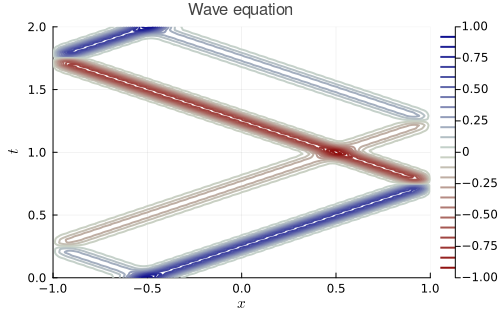

In [7]:
using Plots
t = range(0, 2, 80)
U = [extend(w(t)[1:m-1]) for t in t]
contour(x, t, hcat(U...)';
    levels=24,
    color=:redsblues,  clims=(-1, 1),
    xlabel=L"x",  ylabel=L"t",
    title="Wave equation",  right_margin=3Plots.mm)

In [8]:
anim = @animate for t in range(0 ,2, 120)
    plot(x, extend(w(t)[1:m-1]);
        label=@sprintf("t=%.3f",t),
        xaxis=(L"x"),  yaxis=([-1, 1], L"u(x,t)"),
        dpi=150,  title="Wave equation")
end
mp4(anim, "wave-boundaries.mp4")

[ Info: Saved animation to /Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section4/julia/wave-boundaries.mp4


Plots.AnimatedGif("/Users/driscoll/Dropbox/Mac/Documents/GitHub/fnc-notebooks/chapter12/section4/julia/wave-boundaries.mp4")

The original hump breaks into two pieces of different amplitudes, each traveling with speed $c=2$. They pass through one another without interference. When a hump encounters a boundary, it is perfectly reflected, but with inverted shape. At time $t=2$, the solution looks just like the initial condition.